# Neste relatório foram analisados os dados sobre a venda de jogos de Playstation 4 ao redor do mundo até o ano de 2018.

### Foi chegada a seguinte conclusão depois de realizadas todas as análises:

> A região onde foi vendida a maior quantidade de jogos foi a **Europa**, com um total de **257,07** milhões de vendas.

> O ano em que foram vendidos mais jogos foi em **2016**, com um total de **135.72** milhões de jogos vendidos.

> Os 3 gêneros de jogos mais vendidos no mundo foram:
*   Action 
*   Shooters
*   Sports

> Enquanto os gêneros menos vendidos no mundo foram:
*   Visual Novel
*   Puzzle
*   Party

> As 3 produtoras que mais venderam jogos no mundo foram:
*   Activision
*   Ubisoft
*   Eletronic Arts

> Os 3 jogos mais vendidos no mundo foram: 
*   Grand Theft Auto V
*   Call of Duty: Black Ops 3
*   Red Dead Redemption 2




---


In [1]:
# importando as libs
# libs para modelagem e matrizes
import numpy as np
import pandas as pd

#libs para análises gráficas
import seaborn as sns
import matplotlib.pyplot as plt

#lib de avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importando os dados
# detalhe: a codificação deste arquivo é 'latin-1' pois estava dando erro fora dessa codificação
dados = pd.read_csv('PS4_GamesSales.csv', encoding = 'latin-1')
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
# verificando o tamanho da base de dados
dados.shape

(1034, 9)

In [4]:
# verificando as informações da base de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [5]:
# verificando os arquivos nulos
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [6]:
# retirando os valores nulos da base da dados
dados.dropna(inplace = True)

In [7]:
# verificando o novo tamanho
dados.shape

(825, 9)

In [8]:
# descrevendo os dados
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


### Alguns jogos estão com valor 0 de vendas pois não atingiram um valor mínimo para ser contabilizados

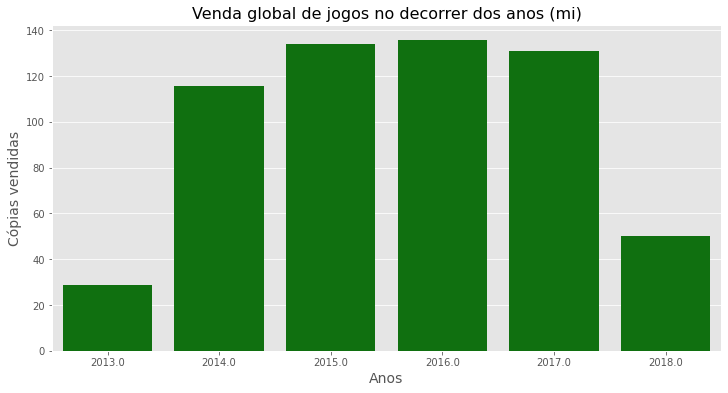

In [50]:
# analisando graficamente o valor das vendas globais por ano
plt.figure(figsize = (12,6))
plt.title('Venda global de jogos no decorrer dos anos (mi)', fontsize = 16)
sns.barplot(data = dados, x = 'Year', y = 'Global', ci = None, color = 'green', estimator = sum)
plt.xlabel('Anos', fontsize = 14)
plt.ylabel('Cópias vendidas', fontsize = 14);

In [10]:
# conferindo os valores do gráfico
dados.groupby(by = ['Year'])['Global'].sum()

Year
2013.0     28.76
2014.0    115.85
2015.0    133.99
2016.0    135.72
2017.0    130.90
2018.0     50.20
2019.0      0.00
2020.0      0.00
Name: Global, dtype: float64

In [11]:
# retirando os anos com valor de vendas globais = 0
dados = dados.loc[(dados['Year'] != 2019) & (dados['Year'] != 2020)]
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


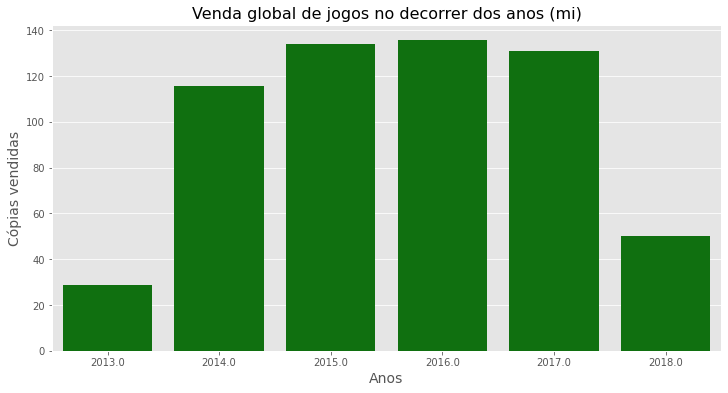

In [42]:
# analisando graficamente o valor das vendas globais por ano sem os anos zerados
plt.figure(figsize = (12,6))
plt.title('Venda global de jogos no decorrer dos anos (mi)', fontsize = 16)
sns.barplot(data = dados, x = 'Year', y = 'Global', ci = None, color = 'green', estimator = sum)
plt.xlabel('Anos', fontsize = 14)
plt.ylabel('Cópias vendidas', fontsize = 14);

In [13]:
# verificando em qual ano foi vendida a maior quantidade de jogos
dados.groupby(by = ['Year'])['Global'].sum()

Year
2013.0     28.76
2014.0    115.85
2015.0    133.99
2016.0    135.72
2017.0    130.90
2018.0     50.20
Name: Global, dtype: float64

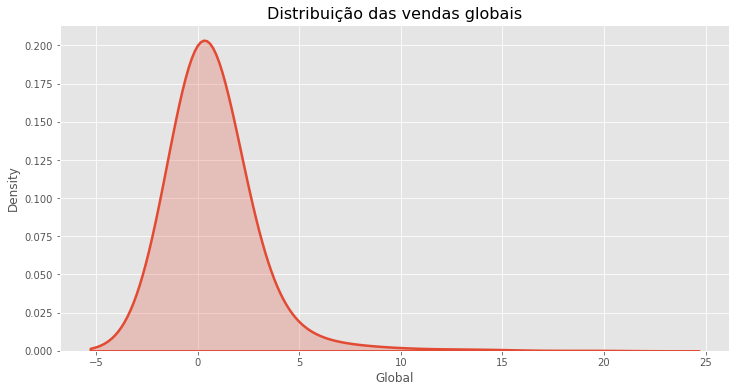

In [14]:
# analisando a distribuição das vendas globais
plt.figure(figsize = (12,6))
plt.style.use('ggplot')
plt.title('Distribuição das vendas globais', fontsize = 16)
sns.kdeplot(dados['Global'], shade = True, bw = 1, linewidth = 2.5);

In [15]:
# verificando as vendas por ano em todos os locais
analise = dados.groupby(by = ['Year']).sum()
analise

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


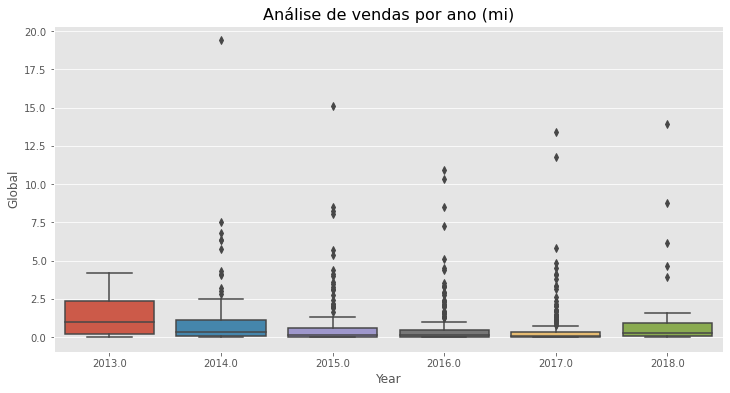

In [16]:
# criando uma visualização boxplot das vendas por ano
plt.figure(figsize = (12,6))
plt.title('Análise de vendas por ano (mi)', fontsize = 16)
sns.boxplot(data = dados, x = 'Year', y = 'Global');

In [17]:
# verificado os jogos com mais de 10 mi de cópias vendidas
dados.loc[(dados['Global'] >= 10)]


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [18]:
# analisando a proporção de cada região em relação ao total
America = [ (America / Total) * 100 for America, Total in zip(analise['North America'], analise['Global'])]
Europa = [ (Europa / Total) * 100 for Europa, Total in zip(analise['Europe'], analise['Global'])]
Japao = [ (Japao / Total) * 100 for Japao, Total in zip(analise['Japan'], analise['Global'])]
Mundo = [ (Mundo / Total) * 100 for Mundo, Total in zip(analise['Rest of World'], analise['Global'])]

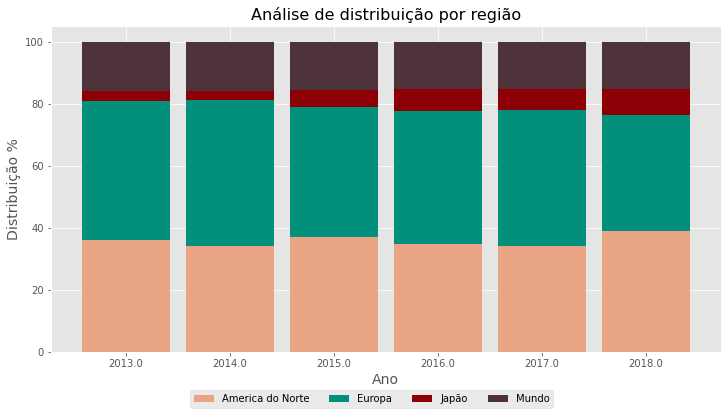

In [19]:
# analisando graficamente a proporção de cada região em relação ao total

# alterando o tamanho da figura e titulo
plt.figure(figsize = (12,6))
plt.title('Análise de distribuição por região', fontsize = 16)

# definindo os rotulos e grupos
rotulos = analise.index
grupos = [0,1,2,3,4,5]

# plotando as barras
plt.bar(grupos, America, width = 0.85, color = '#e9a385')
plt.bar(grupos, Europa, bottom = America, width = 0.85, color = '#02907d')
plt.bar(grupos, Japao, bottom = [A + B for A,B in zip(America, Europa)], width = 0.85, color = '#8c0005')
plt.bar(grupos, Mundo, bottom = [A + B + C for A,B,C in zip(America, Europa, Japao)], width = 0.85, color = '#4d3339')

# alterando os labels e adicionando a legenda
plt.xticks(grupos, rotulos)
plt.xlabel('Ano', fontsize = 14)
plt.ylabel('Distribuição %', fontsize = 14)
plt.legend(['America do Norte','Europa','Japão','Mundo'], loc = 'upper left', bbox_to_anchor = (0.20, -0.1), ncol = 4);

In [20]:
# verificando todas as editoras
dados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

### Seria muito difícil fazer gráficos com quantidades grandes de dados unicos, então é melhor atribuir um valor para cada um para que fique mais fácil de visualizar graficamente

In [21]:
# importando o label encoder, essa função substitui um valor em texto por um valor numérico único
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

dados['Produtor'] = funcao_label.fit_transform(dados['Publisher'])
dados['Genero'] = funcao_label.fit_transform(dados['Genre'])
dados['Jogo'] = funcao_label.fit_transform(dados['Game'])

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [22]:
# definindo uma paleta de cores pro seaborn
paleta_cores = sns.color_palette("rocket",8)
paleta_cores

[(0.16342174, 0.0851396, 0.21088893),
 (0.33067031, 0.11701189, 0.30632563),
 (0.51728314, 0.1179558, 0.35453252),
 (0.70457834, 0.0882129, 0.34473046),
 (0.86641628, 0.17387796, 0.27070818),
 (0.94291042, 0.37549479, 0.26369821),
 (0.96173392, 0.57988594, 0.41844491),
 (0.96656022, 0.75658231, 0.62527295)]

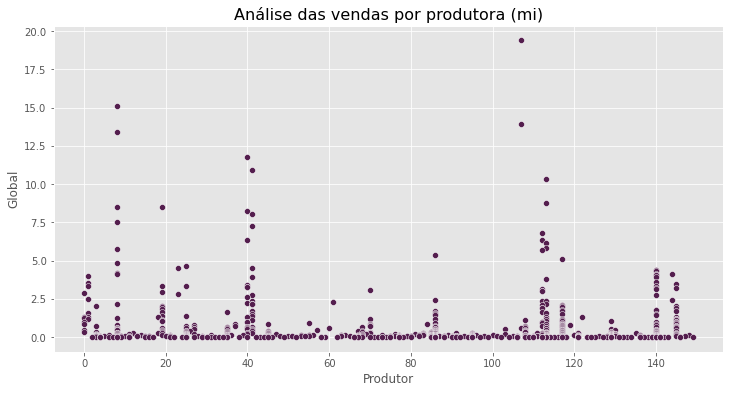

In [51]:
# analisando graficamente as vendas por produtor
plt.figure(figsize = (12,6))
plt.title('Análise das vendas por produtora (mi)', fontsize = 16)

sns.scatterplot(data = dados, x = 'Produtor', y = 'Global', color = paleta_cores[1]);

In [24]:
# verificando os mais vendidos por produtora
dados.groupby( by = ['Produtor'])['Global'].sum().sort_values(ascending = False)

Produtor
8      72.44
140    59.16
41     54.96
113    54.85
40     47.55
       ...  
124     0.00
123     0.00
30      0.00
32      0.00
104     0.00
Name: Global, Length: 150, dtype: float64

In [25]:
# verificando quais são as top 3 produtoras que mais venderam jogos
dados.loc[(dados['Produtor'] == 8) | (dados['Produtor'] == 140) | (dados['Produtor'] == 41)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,41,14,221
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48,8,12,100
11,Star Wars Battlefront 2015,2015.0,Shooter,Electronic Arts,3.31,3.19,0.23,1.30,8.03,41,12,605
...,...,...,...,...,...,...,...,...,...,...,...,...
755,The Amazing Spider-Man 2,2014.0,Misc,Activision,0.00,0.00,0.00,0.00,0.00,8,5,642
916,Tetris UltimateÊ,2014.0,Puzzle,Ubisoft,0.00,0.00,0.00,0.00,0.00,140,9,640
918,The Legend of Korra (2014),2014.0,Action,Activision,0.00,0.00,0.00,0.00,0.00,8,0,671
952,Assassin's Creed: Victory,2015.0,Action,Ubisoft,0.00,0.00,0.00,0.00,0.00,140,0,39


In [45]:
# outra maneira mais fácil e simplificada de verificar as top produtoras seria
dados.groupby( by = ['Publisher'])['Global'].sum().sort_values(ascending = False)
# assim já pegamos o nome e não é preciso pesquisar pelo número de cada uma

Publisher
Activision                        72.44
Ubisoft                           59.16
Electronic Arts                   54.96
Sony Interactive Entertainment    54.85
EA Sports                         47.55
                                  ...  
Tammeka Games                      0.00
Taleworlds                         0.00
Compulsion Games                   0.00
DMM Games                          0.00
Renegade Kid                       0.00
Name: Global, Length: 150, dtype: float64

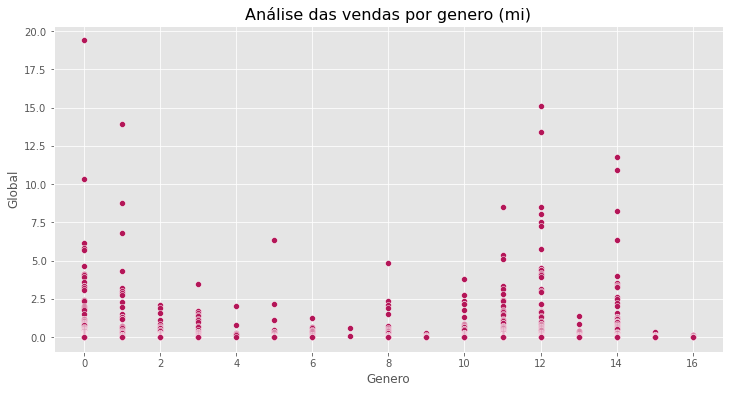

In [26]:
# analisando graficamente as vendas por genero
plt.figure(figsize = (12,6))
plt.title('Análise das vendas por genero (mi)', fontsize = 16)

sns.scatterplot(data = dados, x = 'Genero', y = 'Global', color = paleta_cores[3]);

In [27]:
# verificando os mais vendidos por gênero
dados.groupby( by = ['Genero'])['Global'].sum().sort_values(ascending = False)

Genero
0     136.82
12    134.99
14     92.85
11     62.73
1      61.86
10     25.29
3      19.36
8      17.85
2      15.22
5      12.47
6       5.03
13      4.52
4       3.52
15      1.28
7       0.65
9       0.52
16      0.46
Name: Global, dtype: float64

In [28]:
# verificando quais são os top 3 gêneros mais vendidos
dados.loc[(dados['Genero'] == 0) | (dados['Genero'] == 12) | (dados['Genero'] == 14)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,41,14,221
...,...,...,...,...,...,...,...,...,...,...,...,...
999,Kung Fu Panda: Showdown of Legendary Legends,2015.0,Action,Little Orbit,0.00,0.00,0.00,0.00,0.00,73,0,336
1014,Berserk Musou,2016.0,Action,Tecmo Koei,0.00,0.00,0.00,0.00,0.00,129,0,68
1017,Don Bradman Cricket 17,2016.0,Sports,Tru Blu Entertainment,0.00,0.00,0.00,0.00,0.00,136,14,176
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00,121,0,72


In [29]:
# verificando quais são os top 3 gêneros menos vendidos
dados.loc[(dados['Genero'] == 7) | (dados['Genero'] == 9) | (dados['Genero'] == 16)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
196,Knowledge is Power,2017.0,Party,Sony Interactive Entertainment,0.05,0.47,0.00,0.09,0.61,113,7,332
315,Angry Birds: Star Wars,2013.0,Puzzle,Activision,0.11,0.09,0.00,0.04,0.23,8,9,24
369,Psycho-Pass: Mandatory Happiness,2016.0,Visual Novel,NIS America,0.10,0.02,0.00,0.03,0.15,85,16,497
402,Utawarerumono: Futari no Hakuoro,2016.0,Visual Novel,Atlus,0.05,0.00,0.07,0.01,0.13,14,16,739
441,Puyo Puyo Tetris,2014.0,Puzzle,Sega,0.05,0.03,0.00,0.02,0.10,108,9,503
493,The Silver Case,2017.0,Visual Novel,NIS America,0.05,0.00,0.01,0.01,0.07,85,16,679
564,That's You,2017.0,Party,Sony Interactive Entertainment,0.04,0.00,0.00,0.01,0.04,113,7,641
571,The Talos Principle,2015.0,Puzzle,Nighthawk Interactive,0.00,0.04,0.00,0.01,0.04,88,9,682
591,Lumo,2016.0,Puzzle,Rising Star Games,0.03,0.00,0.00,0.01,0.04,106,9,364
599,Marvel Pinball: Epic Collection Volume 1,2016.0,Puzzle,Nighthawk Interactive,0.03,0.00,0.00,0.01,0.04,88,9,383


In [46]:
# outra maneira mais fácil e simplificada de verificar os top generos mais vendidos é
dados.groupby( by = ['Genre'])['Global'].sum().sort_values(ascending = False)
# assim já pegamos o tipo e não é preciso pesquisar pelo número de cada um

Genre
Action              136.82
Shooter             134.99
Sports               92.85
Role-Playing         62.73
Action-Adventure     61.86
Racing               25.29
Fighting             19.36
Platform             17.85
Adventure            15.22
Misc                 12.47
Music                 5.03
Simulation            4.52
MMO                   3.52
Strategy              1.28
Party                 0.65
Puzzle                0.52
Visual Novel          0.46
Name: Global, dtype: float64

In [47]:
# outra maneira mais fácil e simplificada de verificar os top generos menos vendidos é
dados.groupby( by = ['Genre'])['Global'].sum().sort_values()
# assim já pegamos o tipo e não é preciso pesquisar pelo número de cada um

Genre
Visual Novel          0.46
Puzzle                0.52
Party                 0.65
Strategy              1.28
MMO                   3.52
Simulation            4.52
Music                 5.03
Misc                 12.47
Adventure            15.22
Platform             17.85
Fighting             19.36
Racing               25.29
Action-Adventure     61.86
Role-Playing         62.73
Sports               92.85
Shooter             134.99
Action              136.82
Name: Global, dtype: float64

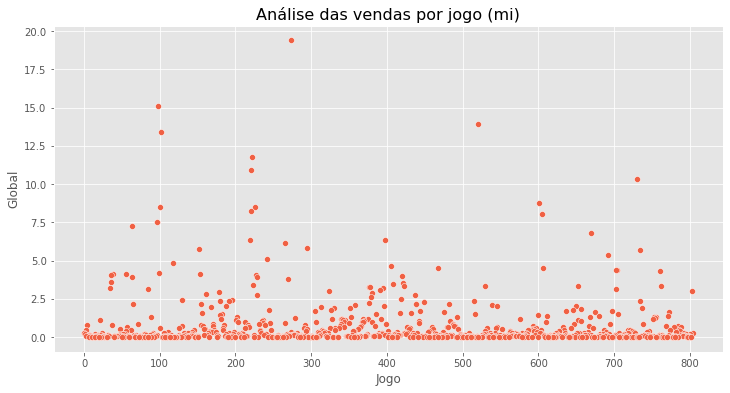

In [30]:
# analisando graficamente as vendas por jogo
plt.figure(figsize = (12,6))
plt.title('Análise das vendas por jogo (mi)', fontsize = 16)

sns.scatterplot(data = dados, x = 'Jogo', y = 'Global', color = paleta_cores[5]);

In [31]:
# verificando os jogos mais vendidos no mundo
dados.groupby( by = ['Jogo'])['Global'].sum().sort_values(ascending = False)

Jogo
273    19.39
98     15.09
521    13.94
102    13.40
222    11.80
       ...  
147     0.00
492     0.00
498     0.00
658     0.00
402     0.00
Name: Global, Length: 805, dtype: float64

In [32]:
# verificando quais são os top 3 jogos mais vendidos
dados.loc[(dados['Jogo'] == 273) | (dados['Jogo'] == 98) | (dados['Jogo'] == 521)]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521


In [48]:
# outra maneira mais fácil e simplificada de verificar os top jogos mais vendidos é
dados.groupby( by = ['Game'])['Global'].sum().sort_values(ascending = False)
# assim já pegamos o nome e não é preciso pesquisar pelo número de cada um

Game
Grand Theft Auto V                      19.39
Call of Duty: Black Ops 3               15.09
Red Dead Redemption 2                   13.94
Call of Duty: WWII                      13.40
FIFA 18                                 11.80
                                        ...  
Deception IV: The Nightmare Princess     0.00
Professional Lumberjack 2016             0.00
Psychonauts                              0.00
The Forest                               0.00
Monochroma                               0.00
Name: Global, Length: 805, dtype: float64

In [49]:
# verificando qual a quantidade total de jogos vendidos na América do Norte
dados['North America'].sum()

211.57

In [34]:
# verificando qual a quantidade total de jogos vendidos na Europa
dados['Europe'].sum()

257.07

In [35]:
# verificando qual a quantidade total de jogos vendidos no Japão
dados['Japan'].sum()

34.69

In [36]:
# verificando qual a quantidade total de jogos vendidos no resto do mundo
dados['Rest of World'].sum()

92.03

In [37]:
# criando variáveis para plotar um gráfico de comparação
regioes = ['America do Norte', 'Europa', 'Japão', 'Resto do Mundo']
quantidade_vendida = [dados['North America'].sum(), dados['Europe'].sum(),dados['Japan'].sum(), dados['Rest of World'].sum() ]


Text(0, 0.5, 'Quantidade Vendida (mi)')

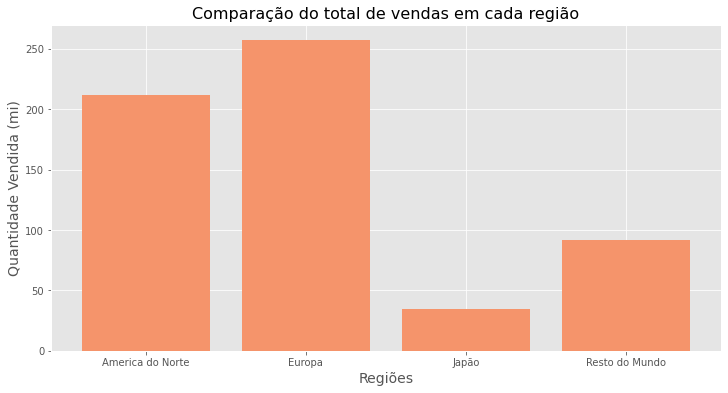

In [38]:
# plotando um gráfico de comparação das regiões
plt.figure(figsize = (12,6))
plt.title('Comparação do total de vendas em cada região', fontsize = 16)
plt.bar(regioes, quantidade_vendida, color = paleta_cores[6])
plt.xlabel('Regiões', fontsize = 14)
plt.ylabel('Quantidade Vendida (mi)', fontsize = 14)